In [1]:
from sympy import *
init_printing(use_unicode=True)

a, x = symbols("a x", real=True)
b_1 = 1.00300865
b_2 = 2.96848838e-2

f1 = (b_1/2) * (x**2) + (b_2/3) * (x**3)
f2 = f1.subs(x, a * x)

# basis for least square
basis = [1 * f1, a * f1, a**2 * f1, a**3 * f1]

# limits for integration
al = 1
au = 2
xl = 3
xu = 7

ModuleNotFoundError: No module named 'sympy'

In [2]:
#Compute RHS
b0 = integrate(integrate(f2 * v0, (a, al, au)), (x, xl, xu))
b1 = integrate(integrate(f2 * v1, (a, al, au)), (x, xl, xu))
b2 = integrate(integrate(f2 * v2, (a, al, au)), (x, xl, xu))
b3 = integrate(integrate(f2 * v3, (a, al, au)), (x, xl, xu))
b = Matrix([b0, b1, b2, b3])

In [3]:
#Compute Grammian
g00 = integrate(integrate(v0 * v0, (a, al, au)), (x, xl, xu))
g01 = integrate(integrate(v0 * v1, (a, al, au)), (x, xl, xu))
g02 = integrate(integrate(v0 * v2, (a, al, au)), (x, xl, xu))
g03 = integrate(integrate(v0 * v3, (a, al, au)), (x, xl, xu))

g10 = integrate(integrate(v1 * v0, (a, al, au)), (x, xl, xu))
g11 = integrate(integrate(v1 * v1, (a, al, au)), (x, xl, xu))
g12 = integrate(integrate(v1 * v2, (a, al, au)), (x, xl, xu))
g13 = integrate(integrate(v1 * v3, (a, al, au)), (x, xl, xu))

g20 = integrate(integrate(v2 * v0, (a, al, au)), (x, xl, xu))
g21 = integrate(integrate(v2 * v1, (a, al, au)), (x, xl, xu))
g22 = integrate(integrate(v2 * v2, (a, al, au)), (x, xl, xu))
g23 = integrate(integrate(v2 * v3, (a, al, au)), (x, xl, xu))

g30 = integrate(integrate(v3 * v0, (a, al, au)), (x, xl, xu))
g31 = integrate(integrate(v3 * v1, (a, al, au)), (x, xl, xu))
g32 = integrate(integrate(v3 * v2, (a, al, au)), (x, xl, xu))
g33 = integrate(integrate(v3 * v3, (a, al, au)), (x, xl, xu))
G = Matrix([[g00, g01, g02, g03], [g10, g11, g12, g13],[g20, g21, g22, g23],[g30, g31, g32, g33]])
print(G)

Matrix([[1038.07941795210, 1557.11912692815, 2422.18530855490, 3892.79781732037], [1557.11912692815, 2422.18530855490, 3892.79781732037, 6436.09239130302], [2422.18530855490, 3892.79781732037, 6436.09239130302, 10899.8338884970], [3892.79781732037, 6436.09239130302, 10899.8338884970, 18833.7265828452]])


In [4]:
soln = G.LUsolve(b)
print(soln)
c0 = soln[0]
c1 = soln[1]
c2 = soln[2]
c3 = soln[3]

Matrix([[-3.00857740180299e-11], [6.28264747151707e-11], [0.895780205430489], [0.104219794536274]])


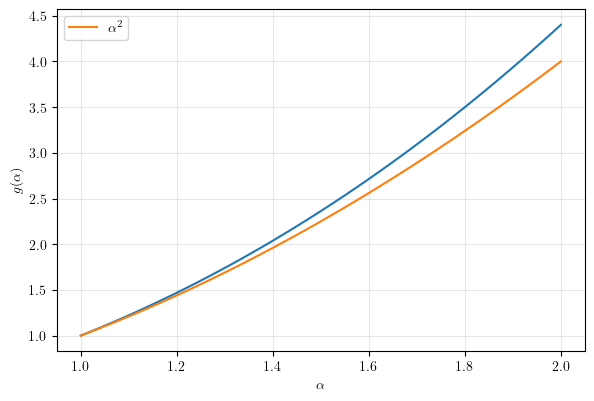

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.size' : 10,
    'pgf.rcfonts': False,
})
alpha = np.linspace(1, 2, 100)
fig, ax = plt.subplots()
ax.plot(alpha,c0 + c1 * alpha + c2 * np.power(alpha, 2) + c3 * np.power(alpha, 3))
ax.plot(alpha, np.power(alpha, 2), label=r'$\alpha^2$')
ax.set_ylabel(r'$g(\alpha)$')
ax.set_xlabel(r'$\alpha$')
ax.legend(loc="best")
plt.grid(alpha=0.3)
fig.tight_layout()
fig.set_size_inches(6, 4)

In [17]:
# if compressor ratios are all identical 
alpha0 = 1.5
#Compute RHS
b0 = integrate(f2 * v0, (x, xl, xu)).subs(a, alpha0)
b = Matrix([b0])

#Compute Grammian
g00 = integrate(v0 * v0, (x, xl, xu))
G = Matrix([[g00]])
print(b, G)

soln = G.LUsolve(b)
print(soln)
c0 = soln[0]

Matrix([[2457.39066698889]]) Matrix([[1038.07941795210]])
Matrix([[2.36724726884267]])


In [18]:
h1=0.9 * (a**2) + 0.1 * (a**3)
h2 = -0.12 + 0.25* a + 0.72 * (a**2) + 0.14 * (a**3)
h3=0.85 * (a**2) + 0.15 * (a**3)

print(alpha0**2, h1.subs(a, alpha0), h2.subs(a, alpha0), h3.subs(a, alpha0))

2.25 2.36250000000000 2.34750000000000 2.41875000000000


/var/folders/jg/pzwz425x52b063t4wxyzfkym0000gp/T/ipykernel_50304/2400559334.py:26: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, zz1, locator=ticker.LogLocator(), cmap='inferno')
/var/folders/jg/pzwz425x52b063t4wxyzfkym0000gp/T/ipykernel_50304/2400559334.py:38: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, zz2, locator=ticker.LogLocator(), cmap='inferno')


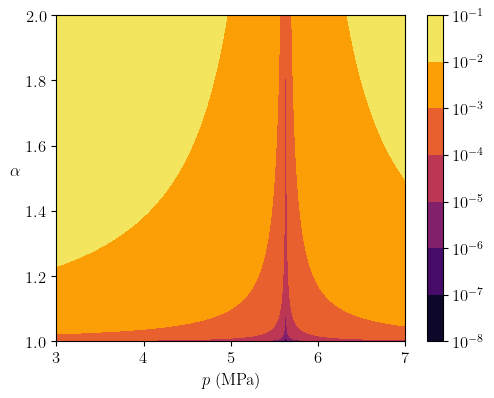

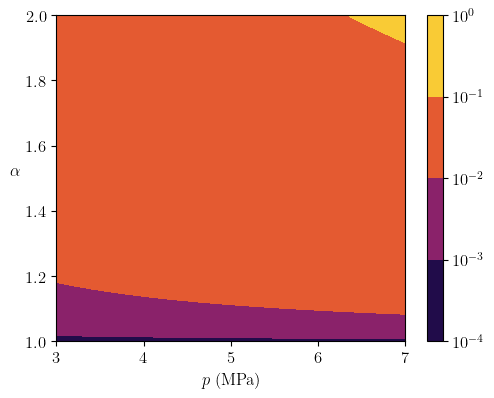

In [17]:
from matplotlib import ticker

matplotlib.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.size' : 12,
    'pgf.rcfonts': False,
})
X = np.linspace(3, 7, 500)
Y = np.linspace(1, 2.0, 500)
xx, yy = np.meshgrid(X, Y)
c0 = 0
c1 = 0
c2 = 0.9
c3 = 0.1
coeffs =[c0, c1, c2, c3]
def pi_cnga(x):
    return (1.003)*np.power(x, 2)/2 + (2.968e-2) *np.power(x,3)/3
def rel_err(x, alpha, coeffs):
    c0, c1, c2, c3 = coeffs
    return abs( pi_cnga(alpha*x) - (c0 + c1*alpha + c2*(alpha**2) + c3*(alpha**3))*pi_cnga(x) )/abs(pi_cnga(alpha*x))

zz1 = rel_err(xx, yy, coeffs)

fig, ax = plt.subplots()
plt.contourf(xx, yy, zz1, locator=ticker.LogLocator(), cmap='inferno')
plt.colorbar()
plt.ylabel(r'$\alpha$', rotation='horizontal', ha='right')
# plt.title(r'$\textrm{Relative Error with} (\gamma_{\mathrm{opt}})\right|$', fontsize=16)
plt.xlabel(r'$p\; (\mathrm{MPa})$')
fig.tight_layout()
fig.set_size_inches(5, 4)
plt.savefig('opt_gamma.pdf')

zz2 = rel_err(xx, yy, [0,0, 1, 0])

fig, ax = plt.subplots()
plt.contourf(xx, yy, zz2, locator=ticker.LogLocator(), cmap='inferno')
plt.colorbar()
plt.ylabel(r'$\alpha$', rotation='horizontal', ha='right')
# plt.title(r'$\textrm{Relative Error with} (\gamma_{\mathrm{opt}})\right|$', fontsize=16)
plt.xlabel(r'$p\; (\mathrm{MPa})$')
fig.tight_layout()
fig.set_size_inches(5, 4)
plt.savefig('alpha_sq_gamma.pdf')